# Реализуйте задния

## Задание 1. Вспомним матан
Созлдайте класс для работы с матрицами. Который будет представлять матрицы и поддреживать основные операции сложение, вычитание умножение транспонирование. Затем добавьте методы для вычисления определителя матрицы и вычисления обраной матрицы.


In [4]:
import numpy as np

In [95]:
class Matrix():

    ''' Класс матриц, который поддерживает основные операции: сложение, вычитание, умножение, транспонирование. 
    Есть методы для вычисления определителя матрицы и вычисления обраной матрицы.
    Функции возвращают объекты класса'''
    
    def __init__(self, matrix):
        self.matrix = matrix
        self.row = len(matrix)
        self.col = len(matrix[0])

    def show(self):
        for string in self.matrix:
            print(*string, sep = ' ')
        
    def summ(self, other):
        if self.row != other.row and self.col != other.col:
            print('Матрицы разных размеров')
            return
        else: 
            m = [[0 for _ in range(self.col)] for _ in range(self.row)]
            for i in range(self.row):
                for j in range(self.col):
                    m[i][j] = self.matrix[i][j] + other.matrix[i][j]
            return Matrix(m)
            
    def subtract(self, other):
        if self.row != other.row and self.col != other.col:
            print('Матрицы разных размеров')
            return 
        else: 
            m = [[0 for _ in range(self.col)] for _ in range(self.row)]
            for i in range(self.row):
                for j in range(self.col):
                    m[i][j] = self.matrix[i][j] - other.matrix[i][j]
            return Matrix(m)

    def multiply(self, other):
        if self.col != other.row:
            print('Матрицы не подходящих размеров для умножения')
            return 
        else:
            # Транспонируем вторую матрицу для удобства получения колонки
            transposed = [[0 for _ in range(other.row)] for _ in range(other.col)]
            for i in range(other.col):
                for j in range(other.row):
                    transposed[i][j] = other.matrix[j][i]
                   
            m = [[0 for _ in range(other.col)] for _ in range(self.row)]
            for i in range(self.row):
                for j in range(other.col):
                    m[i][j] = sum([x * y for x, y in zip(self.matrix[i], transposed[j])])
            
            return Matrix(m)
            
    def determinant(self):
        if self.col != self.row:
            print('Определителя для не квадратной матрицы не существует')
            return
        else:
            return round(np.linalg.det(self.matrix))


    def inverse(self):
        if not self.determinant():
            print('Обратной матрицы не существует')
            return
        elif self.determinant() == 0:
            print('Определитель равен нулю, обратной матрицы не существует')
        else:
            return Matrix(np.linalg.inv(self.matrix))

    

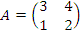

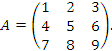



In [96]:
m1 = Matrix([[3,4] , [1,2]])
m2 = Matrix([[1,2,3], [4,5,6], [7, 8, 9]])
m3 = Matrix([[1,1,1], [1,1,1], [1,1,1]])
m4 = Matrix([[1,1,1], [1,1,1]])
m5 = Matrix([[5,6], [7,8], [9,10]])

In [97]:
# Сложение и вычитание существует только для матриц одинакового размера
m1.summ(m2)

Матрицы разных размеров


In [98]:
m2.summ(m3).show()

2 3 4
5 6 7
8 9 10


In [99]:
m2.subtract(m3).show()

0 1 2
3 4 5
6 7 8


In [100]:
# Матричное умножение возможно между матрицами размеров MxK и KxN. Полученная матрица будет размера MxN.
m4.multiply(m5).show()

21 24
21 24


In [101]:
m5.multiply(m4).show()

11 11 11
15 15 15
19 19 19


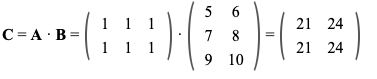

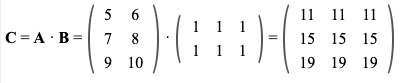

In [102]:
m1.multiply(m2)

Матрицы не подходящих размеров для умножения


In [103]:
# Детерминант имеет смысл растяжения или искажения евклидова пространства, поэтому сущетсвует только для квадратных матриц.
print(
    m1.determinant(),
    m2.determinant(),
    m3.determinant(),
    m4.determinant(), #не квадратная матрица
    m5.determinant(), #не квадратная матрица
    sep = '\n'
)

Определителя для не квадратной матрицы не существует
Определителя для не квадратной матрицы не существует
2
0
0
None
None


In [104]:
# Обратная матрица существует только при условии существования детерминанта (те квадратной матрицы) и если он не равен нулю.
m1.inverse().show()

0.9999999999999998 -1.9999999999999996
-0.4999999999999999 1.4999999999999998


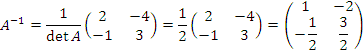

In [105]:
m2.inverse()

Обратной матрицы не существует


In [106]:
m3.inverse()

Обратной матрицы не существует


In [107]:
m4.inverse()

Определителя для не квадратной матрицы не существует
Обратной матрицы не существует


In [108]:
m5.inverse()

Определителя для не квадратной матрицы не существует
Обратной матрицы не существует


In [109]:
m6 = Matrix([ [1, -2, 3], [0, 4, -1], [5, 0, 1] ])

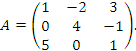

In [113]:
m6.inverse().show()
m6_inversed = m6.inverse()

-0.08695652173913045 -0.04347826086956522 0.21739130434782608
0.10869565217391305 0.30434782608695654 -0.02173913043478261
0.4347826086956522 0.2173913043478261 -0.08695652173913045


In [115]:
m6.multiply(m6_inversed).show()

1.0 0.0 -5.551115123125783e-17
0.0 1.0 0.0
0.0 0.0 0.9999999999999999


## Задание 2. 

Разарботайте классы Warehouse Product Order для управления складскими запасами. Реализуйте функцонал по добавлению и списанию остатков, учету остатоков на складе и формированию заказа.